## Find Iris with Daugman algorithm example

In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from daugman import find_iris

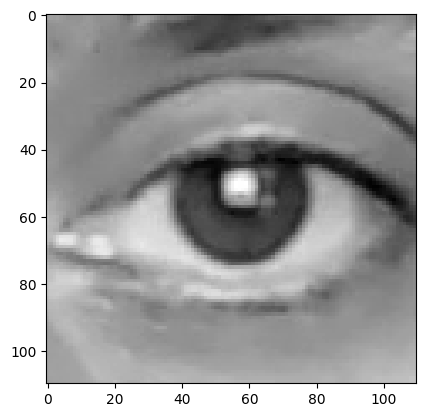

In [2]:
# read, square crop and grayscale image of an eye
img = cv2.imread('eye.jpg')
img = img[20:130, 20:130]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_ = plt.imshow(gray_img, cmap='gray')

We are considering every pixel in the central third of the image as a possible iris center.
But we could reduce that number with `points_step`.   
*It has a linear correlation with overall iris search speed.*


For each possible iris center, we will consider different radii, given as `range(daugman_start, daugman_end, daugman_step)`.   
*The `daugman_step` has a linear correlation with overall iris search speed.*

See `daugman_visual_explanation.ipynb` for details and intuition

In [12]:
# minimal iris radius -- 10px
# maximal iris radius -- 30px
answer = find_iris(gray_img, daugman_start=10, daugman_end=30, daugman_step=1, points_step=3)
print(answer)

iris_center, iris_rad = answer

((57, 54), 20)


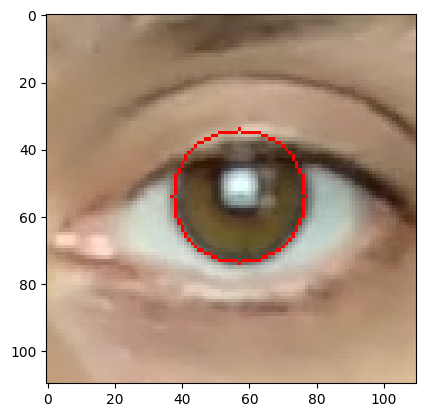

In [4]:
# plot result
out = img.copy()
cv2.circle(out, iris_center, iris_rad, (0, 0, 255), 1)
_ = plt.imshow(out[::,::,::-1])

## Speed measurement

Play with `daugman_step` and `points_step` params.

In [5]:
%%timeit
find_iris(gray_img, daugman_start=10, daugman_end=30, daugman_step=1, points_step=3)

56.8 ms ± 426 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Function profiling

In [6]:
import cProfile

cProfile.run('find_iris(gray_img, daugman_start=10, daugman_end=30, daugman_step=1, points_step=3)')

         16311 function calls in 0.065 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.062    0.062 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 base_events.py:2003(get_debug)
        1    0.000    0.000    0.062    0.062 daugman.py:63(find_iris)
      169    0.046    0.000    0.063    0.000 daugman.py:8(daugman)
      169    0.000    0.000    0.000    0.000 fromnumeric.py:1136(_argmax_dispatcher)
      169    0.000    0.000    0.001    0.000 fromnumeric.py:1140(argmax)
      169    0.000    0.000    0.000    0.000 fromnumeric.py:53(_wrapfunc)
        1    0.000    0.000    0.000    0.000 history.py:839(_writeout_output_cache)
      169    0.000    0.000    0.000    0.000 multiarray.py:1080(copyto)
      169    0.000    0.000    0.000    0.000 multiarray.py:85(empty_like)
      169    0.000    0.000    0.000    0.000 numeric.py:63(_zeros_like_dispatcher)
      169    0.